In [1]:
import pygmo as pg
from pykep import epoch, util
from pykep.planet import jpl_lp
from pykep.planet import spice
from pykep.trajopt import mga_1dsm
util.load_spice_kernel('de430.bsp')

In [2]:
def goto_mars():
    # We define an Earth-Mars problem (single-objective)
    seq = [jpl_lp('earth'),jpl_lp('mars')]
    udp = mga_1dsm(
        seq=seq,
        t0=[epoch(18*365.25 + 1), epoch(25*365.25 + 1)],
        tof=[0.7 * 365.25, 7 * 365.25],
        vinf=[0.5, 5],
        add_vinf_dep=False,
        add_vinf_arr=True,
        multi_objective=False
    )

    pg.problem(udp)
    # We solve it!!
    uda = pg.sade(gen=200)
    archi = pg.archipelago(algo=uda, prob=udp, n=8, pop_size=30)
    print(
        "Running a Self-Adaptive Differential Evolution Algorithm .... on 8 parallel islands")
    archi.evolve(10)
    archi.wait()
    sols = archi.get_champions_f()
    idx = sols.index(min(sols))
    print("Done!! Solutions found are: ", archi.get_champions_f())
    print(f"\nThe best solution with Dv = {min(sols)[0]}:\n")
    udp.pretty(archi.get_champions_x()[idx])
    udp.plot(archi.get_champions_x()[idx])

Running a Self-Adaptive Differential Evolution Algorithm .... on 12 parallel islands
Done!! Solutions found are:  [array([2377.85554375]), array([2424.21353748]), array([2418.81141651]), array([2450.12217972]), array([2478.55075304]), array([2381.44440382]), array([2400.69047247]), array([2417.63856887]), array([2386.85636942]), array([2465.92161086]), array([2356.44209243]), array([2417.7029256])]

The best solution with Dv = 2356.4420924326355:

First Leg: earth to mars
Departure: 2024-Sep-10 19:24:23.347956 (9019.80860356431 mjd2000) 
Duration: 845.8867033370269days
VINF: 4.99962598829604 km/sec
DSM after 235.90885813545302 days
DSM magnitude: 1305.650407499216m/s

Arrival at mars
Arrival epoch: 2027-Jan-04 16:41:14.516275 (9865.695306901336 mjd2000) 
Arrival Vinf: 1050.7916849334194m/s
Total mission time: 2.3159115765558576 years


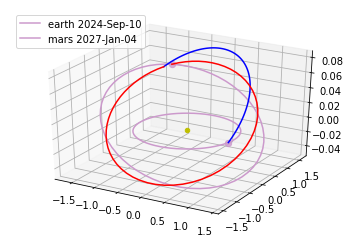

In [3]:
goto_mars()

In [ ]:
def goto_moon():
    # We define an Earth-Mars problem (single-objective)
    seq = [spice('EARTH'),spice('MOON','EARTH')]
    udp = mga_1dsm(
        seq=seq,
        t0=[epoch(18*365.25 + 1), epoch(25*365.25 + 1)],
        tof=[0.7 * 365.25, 7 * 365.25],
        vinf=[0.5, 5],
        add_vinf_dep=False,
        add_vinf_arr=True,
        multi_objective=False
    )

    pg.problem(udp)
    # We solve it!!
    uda = pg.sade(gen=200)
    archi = pg.archipelago(algo=uda, prob=udp, n=12, pop_size=30)
    print(
        "Running a Self-Adaptive Differential Evolution Algorithm .... on 12 parallel islands")
    archi.evolve(10)
    archi.wait()
    sols = archi.get_champions_f()
    idx = sols.index(min(sols))
    print("Done!! Solutions found are: ", archi.get_champions_f())
    print(f"\nThe best solution with Dv = {min(sols)[0]}:\n")
    udp.pretty(archi.get_champions_x()[idx])
    udp.plot(archi.get_champions_x()[idx])

In [ ]:
%%pixie_debugger
goto_moon()